###Identificación y tratamiento de outliers: California Housing Prices


##Docente: M.Sc. Richard Fernández

##INTEGRANTES:
####HUERTA PAHUACHO, Junior Alfredo
#####ZAYERZ CALVO, Luis Alberto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [8]:
!wget https://raw.githubusercontent.com/JuniorAlfredoHuerta/MetodData/38d4cb414c2603dfda0684f038bea8719970b3d7/housing.csv

--2023-06-28 23:20:41--  https://raw.githubusercontent.com/JuniorAlfredoHuerta/MetodData/38d4cb414c2603dfda0684f038bea8719970b3d7/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1.36M  --.-KB/s    in 0.01s   

2023-06-28 23:20:41 (122 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [9]:
data = pd.read_csv('housing.csv')

In [10]:
data.shape

(20640, 10)

In [12]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [14]:
data['ocean_proximity'] = data.ocean_proximity.astype(object)

In [15]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [16]:
data_X = pd.DataFrame(data.drop('ocean_proximity', 1))
data_X.head()

<ipython-input-16-984c12d7c8f9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_X = pd.DataFrame(data.drop('ocean_proximity', 1))


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


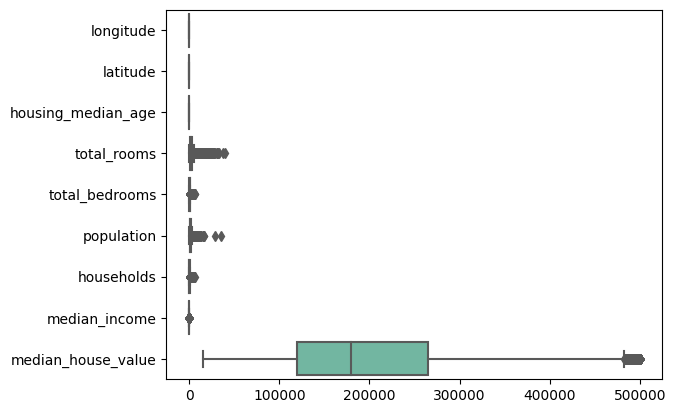

In [17]:
sns.boxplot(data=data_X, orient="h", palette="Set2")
plt.show()

In [18]:
#2.Outlier

def z_score_method(df, variable_name):
    columns = df.columns
    z = np.abs(stats.zscore(df))
    threshold = 3
    outlier = []
    index=0
    for item in range(len(columns)):
        if columns[item] == variable_name:
            index = item
    for i, v in enumerate(z[:, index]):
        if v > threshold:
            outlier.append(i)
        else:
            continue
    return outlier

In [19]:
data_X = pd.DataFrame(data.drop('ocean_proximity', 1))
data_X.head()

<ipython-input-19-984c12d7c8f9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_X = pd.DataFrame(data.drop('ocean_proximity', 1))


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [20]:
#Prueba de normalidad
#Ho: Las var se aprox a una dist. normal
#Ha: Las var NO se aprox a una dist. normal

#pvalue < 5% => Se rechaza la Ho, a un niv. de confianza de 95%,
#la var. no se prox. a una dist. normal.

stats.shapiro(data_X.longitude)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8969986438751221, pvalue=0.0)

In [21]:
#pvalue < 5% => Se rechaza la Ho, a un niv. de confianza de 95%,
#la var. no se prox. a una dist. normal.
stats.shapiro(data_X.latitude)

ShapiroResult(statistic=0.8771096467971802, pvalue=0.0)

In [23]:
stats.shapiro(data_X.housing_median_age)

ShapiroResult(statistic=0.9782373905181885, pvalue=0.0)

In [24]:
stats.shapiro(data_X.total_rooms)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.6952450275421143, pvalue=0.0)

In [25]:
#pvalue < 5% => se rechaza la Ho, a un niv. de confianza de 95%,
#la var. se prox. a una dist. normal.


stats.shapiro(data_X.total_bedrooms)

ShapiroResult(statistic=nan, pvalue=1.0)

In [27]:
stats.shapiro(data_X.population)

ShapiroResult(statistic=0.7133156657218933, pvalue=0.0)

In [28]:
stats.shapiro(data_X.households)

ShapiroResult(statistic=0.7456488609313965, pvalue=0.0)

In [29]:
stats.shapiro(data_X.median_income)

ShapiroResult(statistic=0.8932322859764099, pvalue=0.0)

In [30]:
stats.shapiro(data_X.median_house_value)

ShapiroResult(statistic=0.9123021364212036, pvalue=0.0)

In [31]:
#Con un nivel de confianza del 95%, las variables no se aproximan a una distribución normal
#Sólo se usará este tratamiento para fines explicativos, se debe de usar el "Tratamiento 2"
#Encontrando los valores límite
print("Precio más alto permitido",data_X['median_house_value'].mean() + 3*data_X['median_house_value'].std())

Precio más alto permitido 553042.6645321563


In [32]:
print("Precio más bajo permitido",data_X['median_house_value'].mean() - 3*data_X['median_house_value'].std())

Precio más bajo permitido -139331.03071432686


In [33]:
#Limitación de valores atípicos
upper_limit = data_X['median_house_value'].mean() + 3*data_X['median_house_value'].std()
lower_limit = data_X['median_house_value'].mean() - 3*data_X['median_house_value'].std()

In [34]:
#Encontrando los valores atípicos
data_X[(data_X['median_house_value'] > upper_limit) | (data_X['median_house_value'] < lower_limit)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [35]:
data_X.shape

(20640, 9)

In [36]:
#Recorte de valores atípicos
new_df = data_X[(data_X['median_house_value'] < upper_limit) & (data_X['median_house_value'] > lower_limit)]
new_df.shape

(20640, 9)

In [37]:
#Aplicación de los límites
new_df_cap = data_X.copy()
new_df_cap['median_house_value'] = np.where(
    new_df_cap['median_house_value']>upper_limit,
    upper_limit,
    np.where(
        new_df_cap['median_house_value']<lower_limit,
        lower_limit,
        new_df_cap['median_house_value']
    )
)

In [38]:
#Encontrando los valores atípicos
new_df_cap[(new_df_cap['median_house_value'] > upper_limit) | (new_df_cap['median_house_value'] < lower_limit)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [39]:
new_df_cap.shape

(20640, 9)

<ipython-input-40-b7044b11c5f9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_X['median_house_value'])
<ipython-input-40-b7044b11c5f9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['median_house_value'])


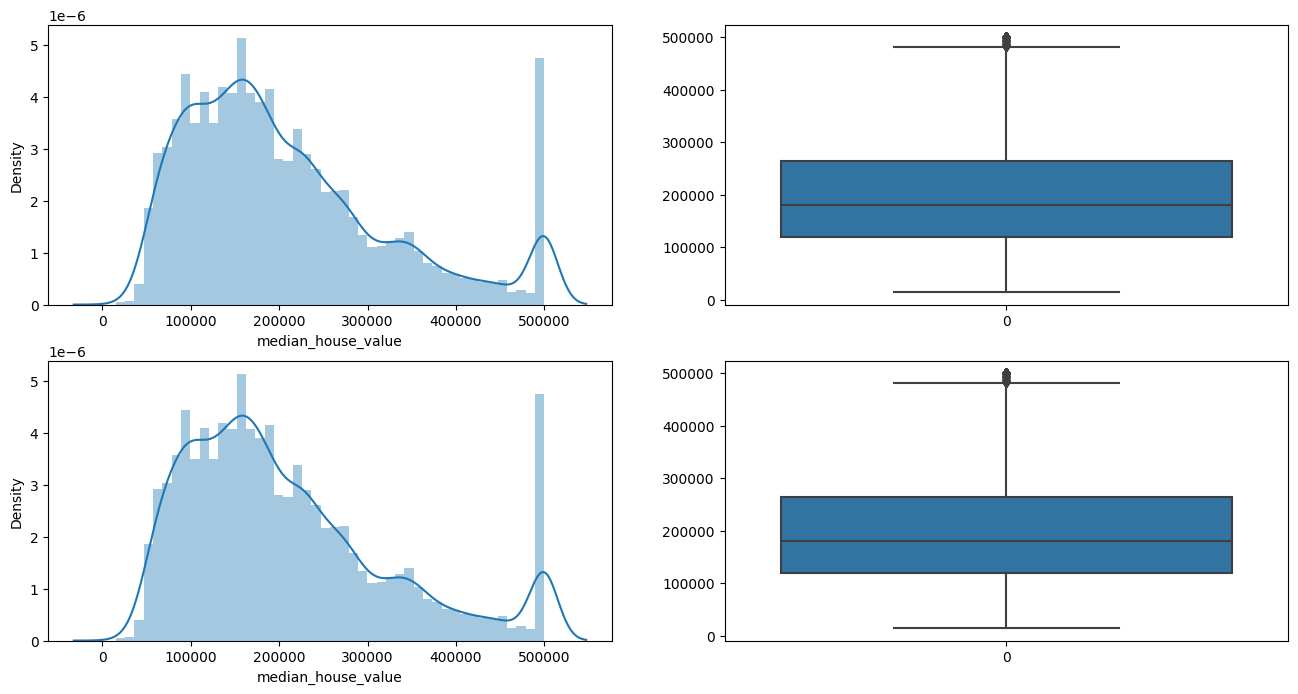

In [40]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_X['median_house_value'])
plt.subplot(2,2,2)
sns.boxplot(data_X['median_house_value'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['median_house_value'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['median_house_value'])
plt.show()

In [41]:
#2.Tratamiento 2
#Las variables no se aproximan a una distribución normal

In [42]:
data_X = pd.DataFrame(data.drop('ocean_proximity', 1))
data_X.head()

<ipython-input-42-984c12d7c8f9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_X = pd.DataFrame(data.drop('ocean_proximity', 1))


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [43]:
#Encontrando RIC
percentile25 = data_X['median_house_value'].quantile(0.25)
percentile75 = data_X['median_house_value'].quantile(0.75)
ric = percentile75 - percentile25

In [44]:
#Limitación de valores atípicos
upper_limit = percentile75 + 1.5 * ric
lower_limit = percentile25 - 1.5 * ric

In [45]:
#Encontrando los valores atípicos
data_X[(data_X['median_house_value'] > upper_limit) | (data_X['median_house_value'] < lower_limit)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0
140,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0
459,-122.25,37.87,52.0,609.0,236.0,1349.0,250.0,1.1696,500001.0
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,489600.0
493,-122.24,37.86,52.0,1668.0,225.0,517.0,214.0,7.8521,500001.0
...,...,...,...,...,...,...,...,...,...
20422,-118.90,34.14,35.0,1503.0,263.0,576.0,216.0,5.1457,500001.0
20426,-118.69,34.18,11.0,1177.0,138.0,415.0,119.0,10.0472,500001.0
20427,-118.80,34.19,4.0,15572.0,2222.0,5495.0,2152.0,8.6499,500001.0
20436,-118.69,34.21,10.0,3663.0,409.0,1179.0,371.0,12.5420,500001.0


In [46]:
#Recorte de valores atípicos
new_df = data_X[data_X['median_house_value'] < upper_limit]
new_df.shape

(19569, 9)

In [48]:
#Aplicación de los límites
new_df_cap = data_X.copy()
new_df_cap['median_house_value'] = np.where(
    new_df_cap['median_house_value'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['median_house_value'] < lower_limit,
        lower_limit,
        new_df_cap['median_house_value']
    )
)

In [49]:
#Encontrando los valores atípicos
new_df_cap[(new_df_cap['median_house_value'] > upper_limit) | (new_df_cap['median_house_value'] < lower_limit)]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value


In [50]:
new_df_cap.shape

(20640, 9)

<ipython-input-51-b7044b11c5f9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_X['median_house_value'])
<ipython-input-51-b7044b11c5f9>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['median_house_value'])


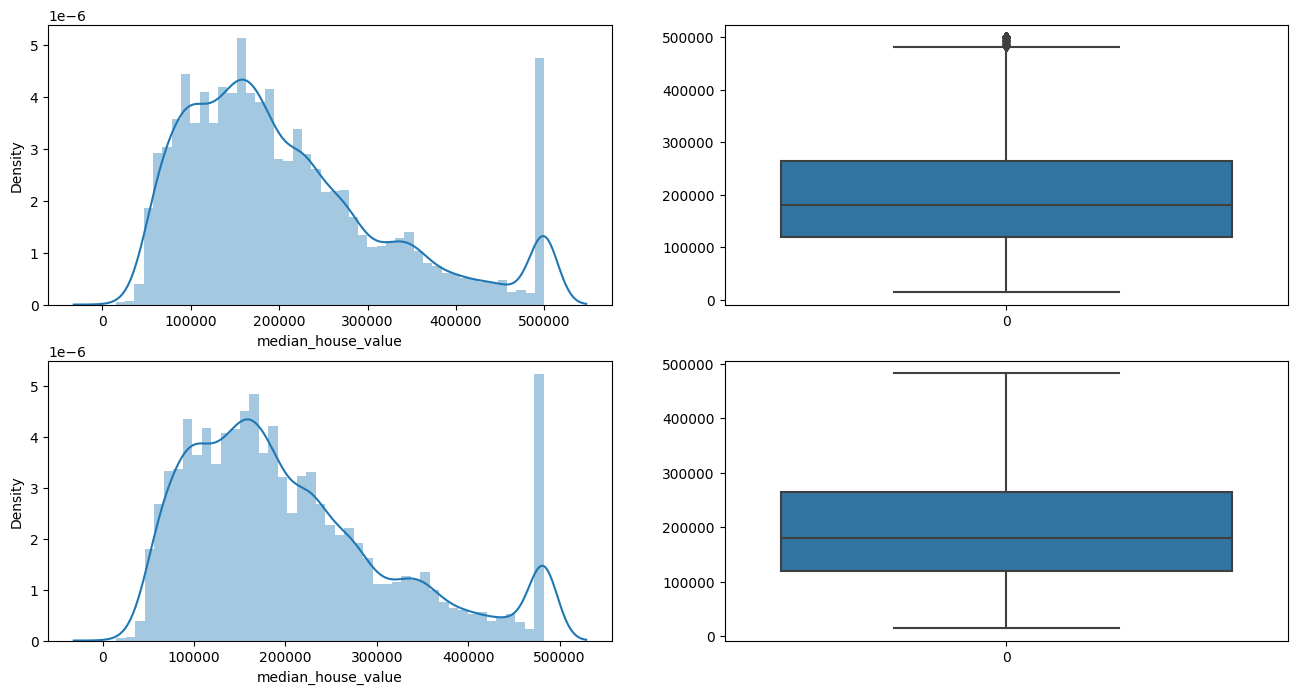

In [51]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data_X['median_house_value'])
plt.subplot(2,2,2)
sns.boxplot(data_X['median_house_value'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['median_house_value'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['median_house_value'])
plt.show()